# Especialização em Inteligência Artificial - IESB
## Disciplina: Aprendidizado Não Supervisionado
### Trabalho final
### Alunos: David Rocha e Walter Malta

## Problema de negócio

SHAP

https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import shap

In [2]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
penguins.describe(include='all')

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
count      344     344        342.000000       342.000000         342.000000   
unique       3       3               NaN              NaN                NaN   
top     Adelie  Biscoe               NaN              NaN                NaN   
freq       152     168               NaN              NaN                NaN   
mean       NaN     NaN         43.921930        17.151170         200.915205   
std        NaN     NaN          5.459584         1.974793          14.061714   
min        NaN     NaN         32.100000        13.100000         172.000000   
25%        NaN     NaN         39.225000        15.600000         190.000000   
50%        NaN     NaN         44.450000        17.300000         197.000000   
75%        NaN     NaN         48.500000        18.700000         213.000000   
max        NaN     NaN         59.600000        21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   334  
unique          NaN     3  
top             NaN  MALE  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

In [5]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
penguins = penguins.dropna()
penguins = penguins[penguins['sex'] != '.']
penguins = penguins.reset_index(drop=True)
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


In [7]:
val_count_cols = ['species', 'island', 'sex']
for col in val_count_cols:
    print(penguins[col].value_counts())
    print()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

MALE      168
FEMALE    165
Name: sex, dtype: int64



<AxesSubplot:xlabel='island', ylabel='count'>

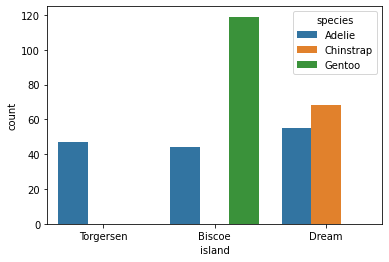

In [8]:
sns.countplot(data=penguins, x='island', hue='species')

In [9]:
penguins.groupby(['island', 'species']).count()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
island    species                                                           
Biscoe    Adelie                   44               44                 44   
          Gentoo                  119              119                119   
Dream     Adelie                   55               55                 55   
          Chinstrap                68               68                 68   
Torgersen Adelie                   47               47                 47   

                     body_mass_g  sex  
island    species                      
Biscoe    Adelie              44   44  
          Gentoo             119  119  
Dream     Adelie              55   55  
          Chinstrap           68   68  
Torgersen Adelie              47   47

<AxesSubplot:xlabel='species', ylabel='count'>

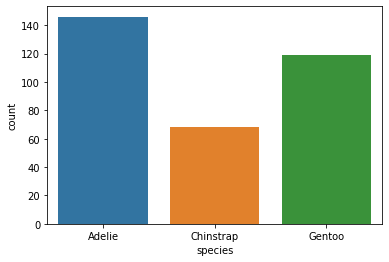

In [10]:
sns.countplot(data=penguins, x='species')

In [11]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

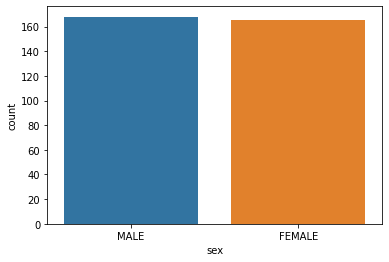

In [12]:
sns.countplot(data=penguins, x='sex')

<AxesSubplot:xlabel='sex', ylabel='count'>

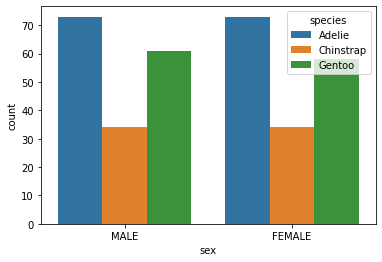

In [13]:
sns.countplot(data=penguins, x='sex', hue='species')

In [14]:
penguins.sex.value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [15]:
penguins.groupby(['sex', 'species'])['sex'].count()

sex     species  
FEMALE  Adelie       73
        Chinstrap    34
        Gentoo       58
MALE    Adelie       73
        Chinstrap    34
        Gentoo       61
Name: sex, dtype: int64

In [16]:
penguins.corr()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.228626           0.653096   
culmen_depth_mm           -0.228626         1.000000          -0.577792   
flipper_length_mm          0.653096        -0.577792           1.000000   
body_mass_g                0.589451        -0.472016           0.872979   

                   body_mass_g  
culmen_length_mm      0.589451  
culmen_depth_mm      -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

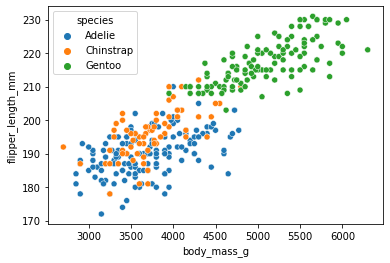

In [17]:
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

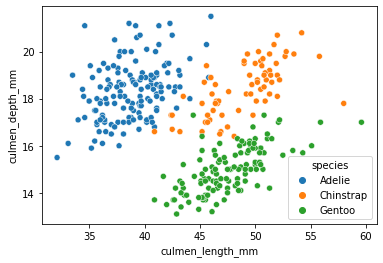

In [18]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='culmen_depth_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

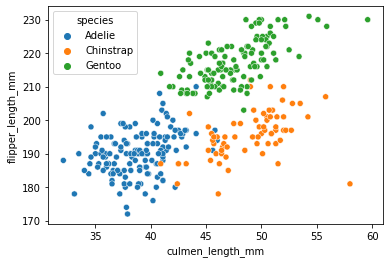

In [19]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='culmen_length_mm', ylabel='body_mass_g'>

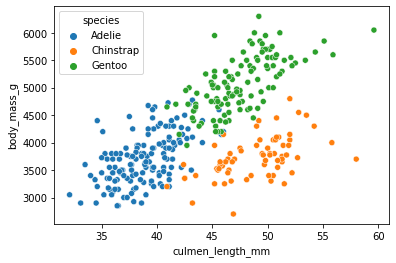

In [20]:
sns.scatterplot(data=penguins, x='culmen_length_mm', y='body_mass_g', hue='species')

In [21]:
px.scatter_3d(penguins, x='culmen_length_mm', y='culmen_depth_mm', z='flipper_length_mm', color='species', title='Penguins Dataset')

In [22]:
px.scatter_3d(penguins, x='culmen_length_mm', y='culmen_depth_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [23]:
px.scatter_3d(penguins, x='culmen_depth_mm', y='flipper_length_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [24]:
px.scatter_3d(penguins, x='culmen_length_mm', y='flipper_length_mm', z='body_mass_g', color='species', title='Penguins Dataset')

In [25]:
penguins = penguins[['island', 'species', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
penguins.head()

island species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen  Adelie              39.1             18.7              181.0   
1  Torgersen  Adelie              39.5             17.4              186.0   
2  Torgersen  Adelie              40.3             18.0              195.0   
3  Torgersen  Adelie              36.7             19.3              193.0   
4  Torgersen  Adelie              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3       3450.0  FEMALE  
4       3650.0    MALE

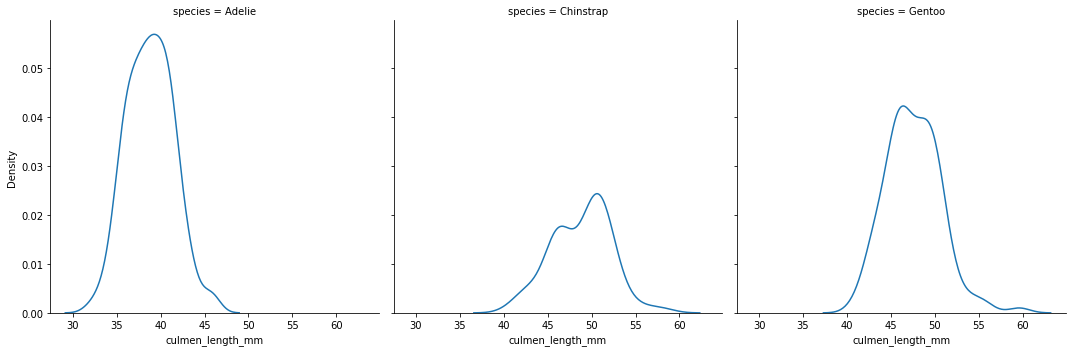

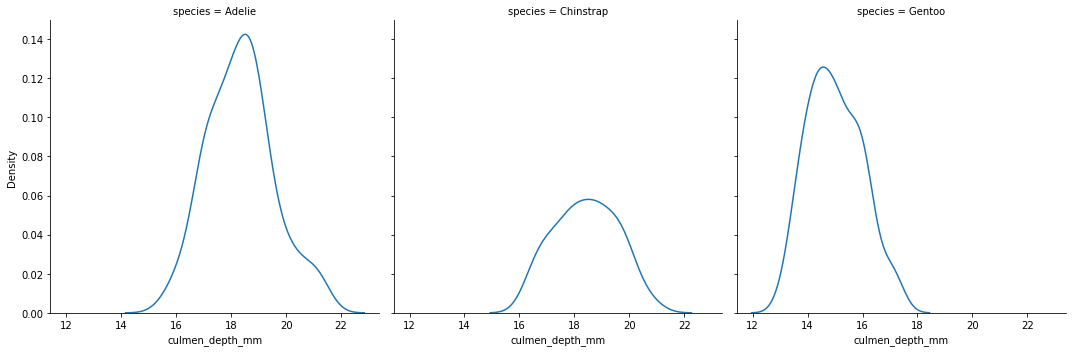

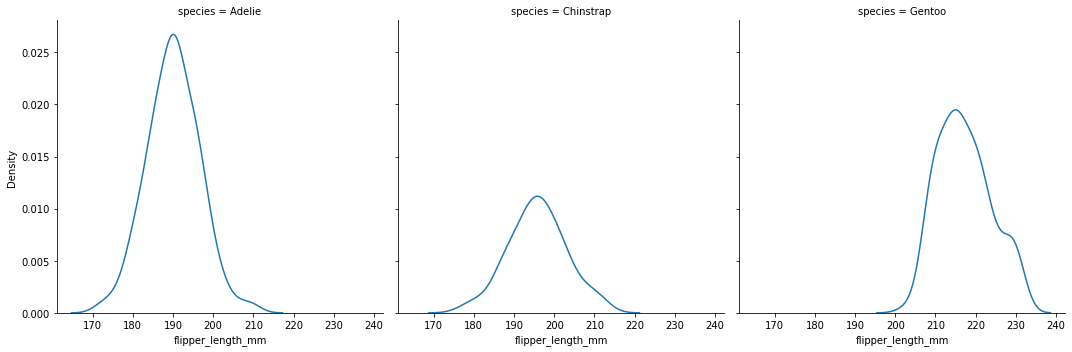

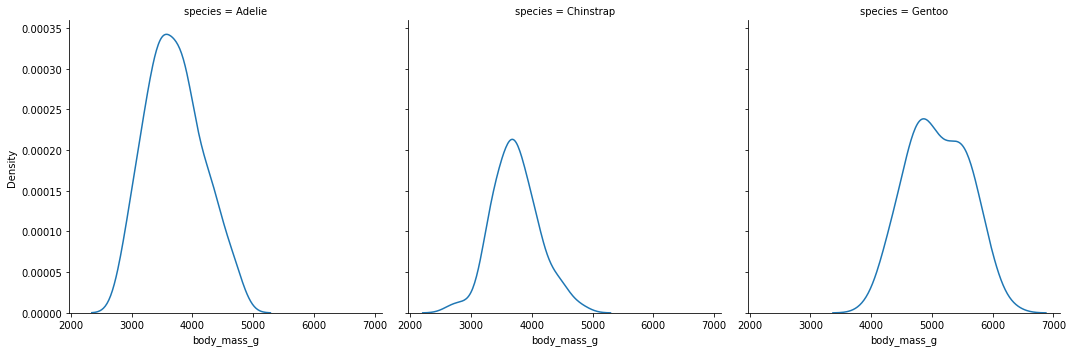

In [26]:
plot_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

for col in plot_cols:
    sns.displot(data=penguins, x=col, col='species', kind='kde')

In [27]:
penguins.groupby('species').agg({'culmen_length_mm': ['count', 'min', 'max', 'mean', 'median'], 'culmen_depth_mm': ['count', 'min', 'max', 'mean', 'median'], 'flipper_length_mm': ['count', 'min', 'max', 'mean', 'median'], 'body_mass_g': ['count', 'min', 'max', 'mean', 'median']})

culmen_length_mm                               culmen_depth_mm  \
                     count   min   max       mean median           count   
species                                                                    
Adelie                 146  32.1  46.0  38.823973  38.85             146   
Chinstrap               68  40.9  58.0  48.833824  49.55              68   
Gentoo                 119  40.9  59.6  47.568067  47.40             119   

                                        flipper_length_mm                \
            min   max       mean median             count    min    max   
species                                                                   
Adelie     15.5  21.5  18.347260  18.40               146  172.0  210.0   
Chinstrap  16.4  20.8  18.420588  18.45                68  178.0  212.0   
Gentoo     13.1  17.3  14.996639  15.00               119  203.0  231.0   

                             body_mass_g                                       
                 mean median       count     min     max         mean  median  
species                                                                        
Adelie     190.102740  190.0         146  2850.0  4775.0  3706.164384  3700.0  
Chinstrap  195.823529  196.0          68  2700.0  4800.0  3733.088235  3700.0  
Gentoo     217.235294  216.0         119  3950.0  6300.0  5092.436975  5050.0

In [28]:
X = penguins.drop(columns='sex')
y = penguins['sex']

print(X.shape, y.shape)

(333, 6) (333,)


In [29]:
print(y[0])
print(y[120])

y = LabelEncoder().fit_transform(y)

print(y[0])
print(y[120])

MALE
FEMALE
1
0


In [30]:
X = pd.get_dummies(X)
X.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
3              36.7             19.3              193.0       3450.0   
4              39.3             20.6              190.0       3650.0   

   island_Biscoe  island_Dream  island_Torgersen  species_Adelie  \
0              0             0                 1               1   
1              0             0                 1               1   
2              0             0                 1               1   
3              0             0                 1               1   
4              0             0                 1               1   

   species_Chinstrap  species_Gentoo  
0                  0               0  
1                  0               0  
2                  0               0  
3                  0               0  
4                  0               0

## Random Forest Regressor -> predict body mass

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(266, 10) (266,) (67, 10) (67,)


In [32]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=6, random_state=7)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=7)

[Text(173.6, 201.90857142857143, 'X[0] <= 47.85\ngini = 0.499\nsamples = 166\nvalue = [126, 140]'),
 Text(80.60000000000001, 170.84571428571428, 'X[0] <= 37.1\ngini = 0.467\nsamples = 119\nvalue = [115, 68]'),
 Text(68.2, 139.78285714285715, 'gini = 0.0\nsamples = 22\nvalue = [39, 0]'),
 Text(93.0, 139.78285714285715, 'X[1] <= 18.0\ngini = 0.498\nsamples = 97\nvalue = [76, 68]'),
 Text(37.2, 108.72, 'X[1] <= 14.85\ngini = 0.287\nsamples = 50\nvalue = [62, 13]'),
 Text(24.8, 77.65714285714284, 'gini = 0.0\nsamples = 22\nvalue = [39, 0]'),
 Text(49.6, 77.65714285714284, 'X[2] <= 214.0\ngini = 0.461\nsamples = 28\nvalue = [23, 13]'),
 Text(24.8, 46.59428571428572, 'X[2] <= 192.5\ngini = 0.219\nsamples = 20\nvalue = [21, 3]'),
 Text(12.4, 15.531428571428563, 'gini = 0.1\nsamples = 15\nvalue = [18, 1]'),
 Text(37.2, 15.531428571428563, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(74.4, 46.59428571428572, 'X[0] <= 46.35\ngini = 0.278\nsamples = 8\nvalue = [2, 10]'),
 Text(62.0, 15.5314

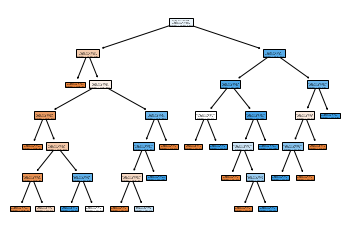

In [33]:
estimator = model.estimators_[5]

plot_tree(estimator, filled = True)

In [34]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [35]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       127
           1       0.99      0.99      0.99       139

    accuracy                           0.99       266
   macro avg       0.99      0.99      0.99       266
weighted avg       0.99      0.99      0.99       266



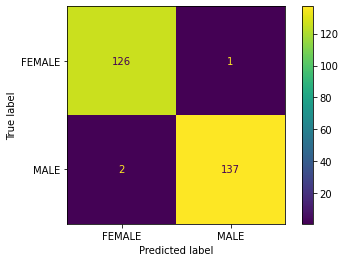

In [36]:
plot_confusion_matrix(model, X_train, y_train, display_labels=['FEMALE', 'MALE'])

In [37]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.93      0.90      0.91        29

    accuracy                           0.93        67
   macro avg       0.93      0.92      0.92        67
weighted avg       0.93      0.93      0.93        67



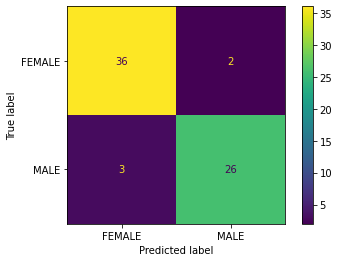

In [38]:
plot_confusion_matrix(model, X_test, y_test, display_labels=['FEMALE', 'MALE'])

In [39]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[9.89259329e-01, 1.07406711e-02],
       [7.58275514e-02, 9.24172449e-01],
       [9.16221287e-02, 9.08377871e-01],
       [2.82487259e-02, 9.71751274e-01],
       [2.32558140e-04, 9.99767442e-01],
       [9.32253144e-01, 6.77468562e-02],
       [9.73028779e-01, 2.69712211e-02],
       [1.99836185e-02, 9.80016381e-01],
       [9.65358230e-01, 3.46417700e-02],
       [9.31472444e-01, 6.85275562e-02],
       [9.92937595e-01, 7.06240495e-03],
       [2.32558140e-04, 9.99767442e-01],
       [3.27363366e-01, 6.72636634e-01],
       [9.74020928e-01, 2.59790716e-02],
       [5.63459880e-02, 9.43654012e-01],
       [9.91662801e-01, 8.33719887e-03],
       [1.04634463e-01, 8.95365537e-01],
       [7.55851968e-01, 2.44148032e-01],
       [2.32558140e-04, 9.99767442e-01],
       [3.71320084e-02, 9.62867992e-01],
       [2.41802044e-01, 7.58197956e-01],
       [9.90936874e-01, 9.06312645e-03],
       [7.42169531e-01, 2.57830469e-01],
       [9.74910912e-01, 2.50890877e-02],
       [6.909244

In [40]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

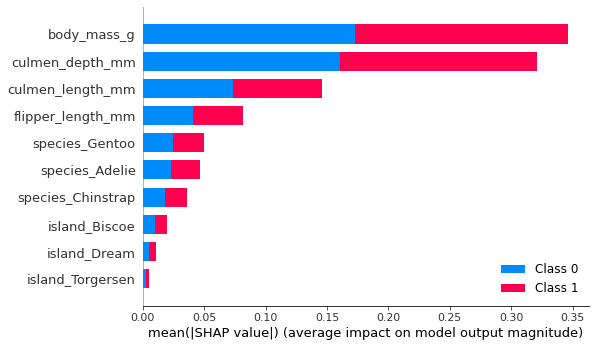

In [41]:
shap.summary_plot(shap_values, X_test)

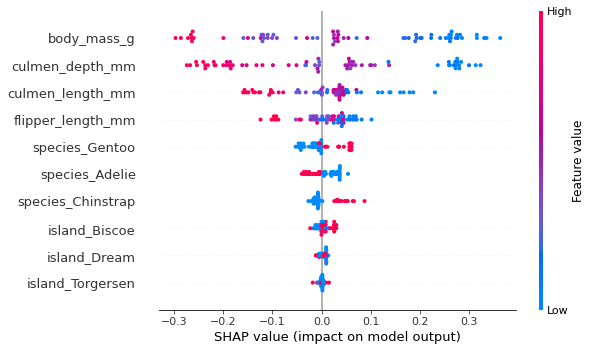

In [42]:
shap.summary_plot(shap_values[0], X_test)

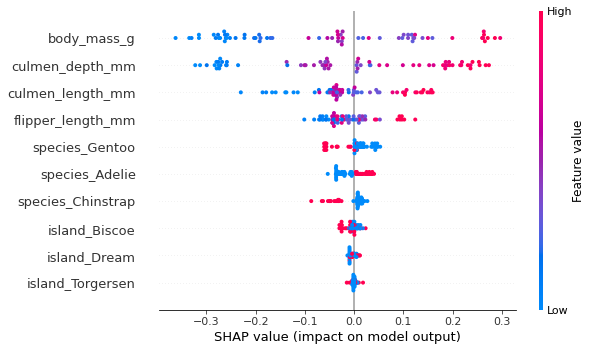

In [43]:
shap.summary_plot(shap_values[1], X_test)

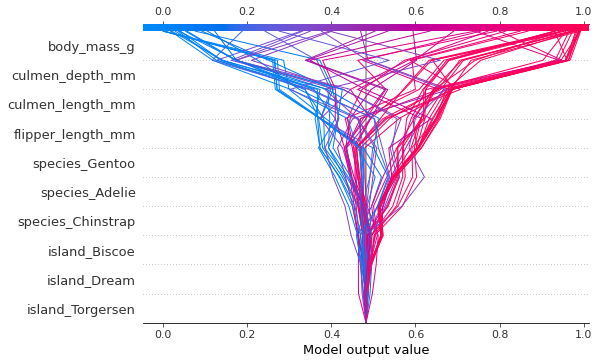

In [44]:
shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0, :])

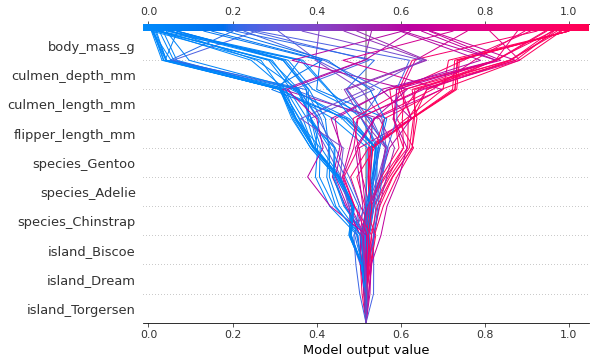

In [45]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[1, :])

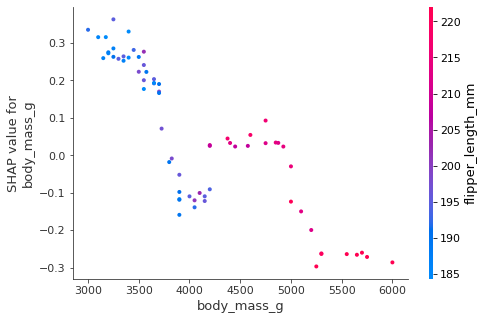

In [46]:
shap.dependence_plot('body_mass_g', shap_values[0], X_test)

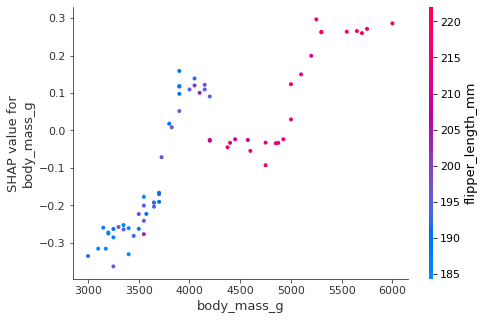

In [47]:
shap.dependence_plot('body_mass_g', shap_values[1], X_test)

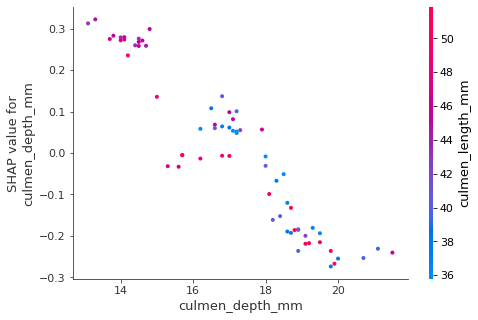

In [48]:
shap.dependence_plot('culmen_depth_mm', shap_values[0], X_test)

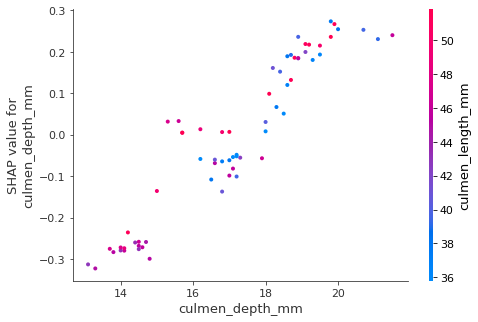

In [49]:
shap.dependence_plot('culmen_depth_mm', shap_values[1], X_test)

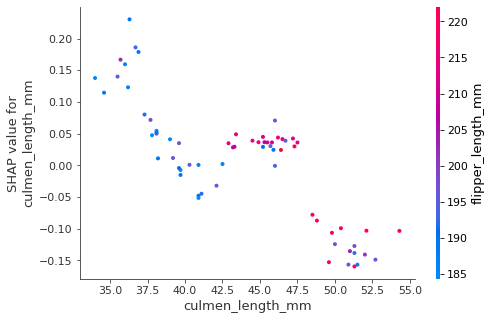

In [50]:
shap.dependence_plot('culmen_length_mm', shap_values[0], X_test)

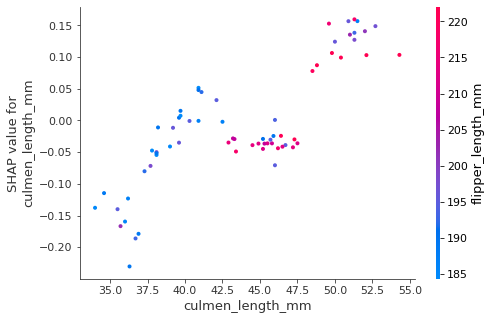

In [51]:
shap.dependence_plot('culmen_length_mm', shap_values[1], X_test)

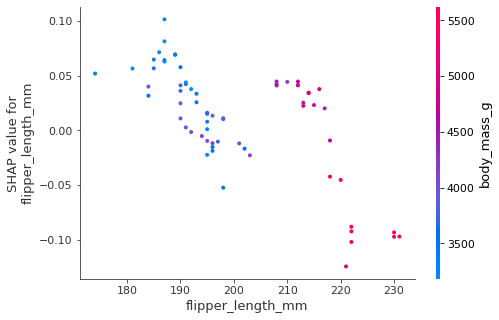

In [52]:
shap.dependence_plot('flipper_length_mm', shap_values[0], X_test)

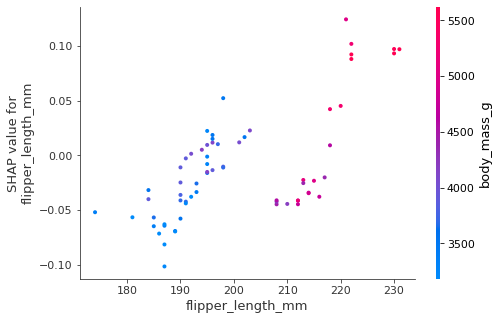

In [53]:
shap.dependence_plot('flipper_length_mm', shap_values[1], X_test)

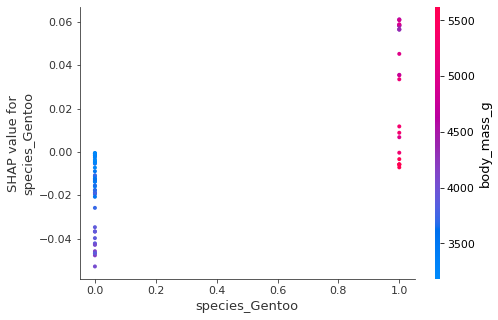

In [54]:
shap.dependence_plot('species_Gentoo', shap_values[0], X_test)

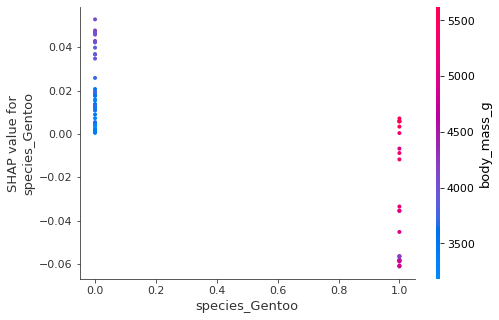

In [55]:
shap.dependence_plot('species_Gentoo', shap_values[1], X_test)

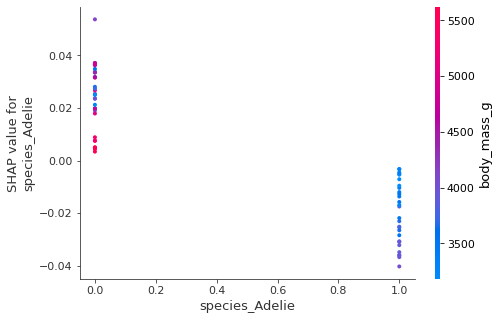

In [56]:
shap.dependence_plot('species_Adelie', shap_values[0], X_test)

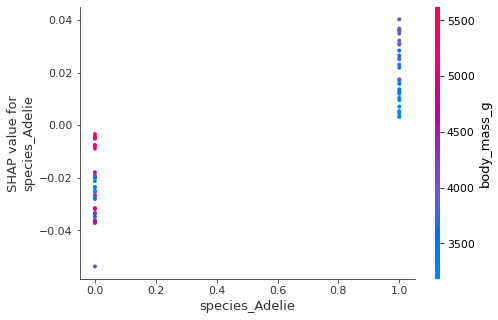

In [57]:
shap.dependence_plot('species_Adelie', shap_values[1], X_test)

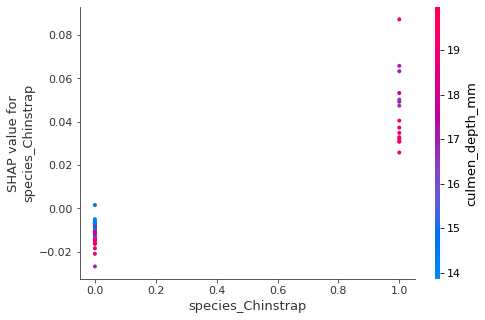

In [58]:
shap.dependence_plot('species_Chinstrap', shap_values[0], X_test)

In [59]:
shap.initjs()

shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[:, :])

In [60]:
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:, :])

In [61]:
shap_values_test0 = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values_test0[0], X_test.iloc[0]) 

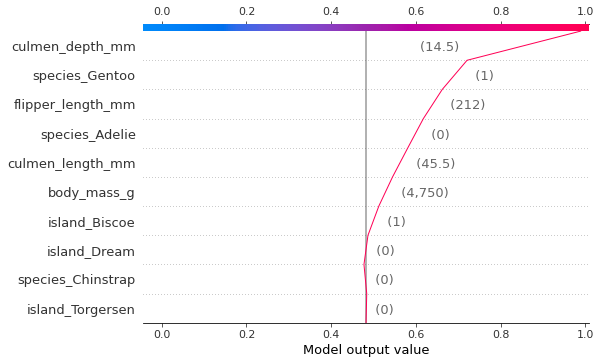

In [62]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], X_test.iloc[0, :])

In [63]:
shap.force_plot(explainer.expected_value[1], shap_values_test0[1], X_test.iloc[0]) 

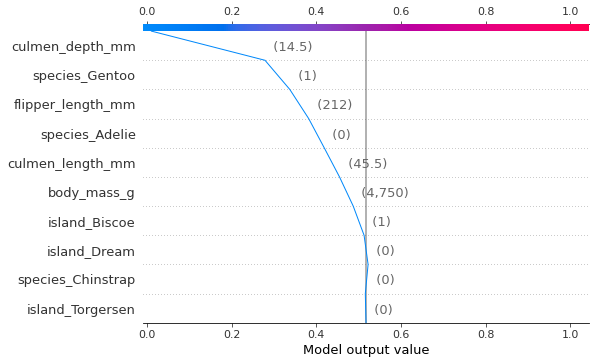

In [64]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0, :])

In [65]:
shap_values_test3 = explainer.shap_values(X_test.iloc[3])
shap.force_plot(explainer.expected_value[0], shap_values_test3[0], X_test.iloc[3])

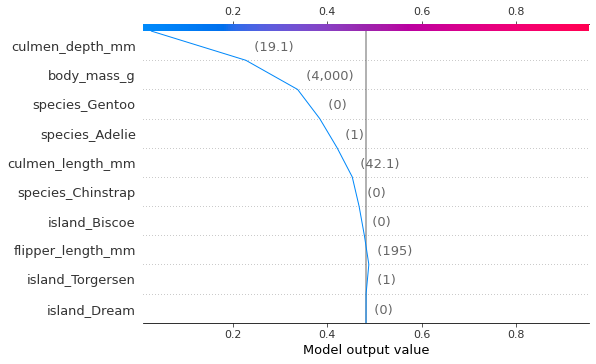

In [66]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][3], X_test.iloc[3, :])

In [67]:
shap.force_plot(explainer.expected_value[1], shap_values_test3[1], X_test.iloc[3]) 

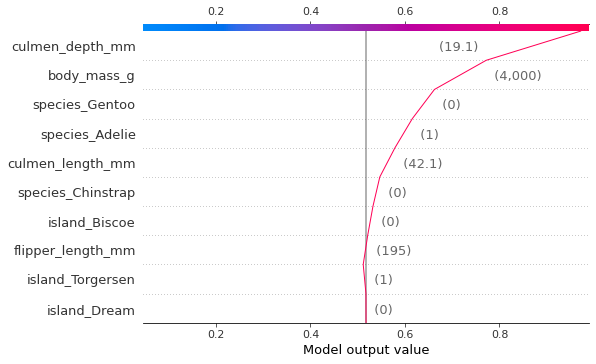

In [68]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][3], X_test.iloc[3, :])

In [69]:
shap_values_test12 = explainer.shap_values(X_test.iloc[12])
shap.force_plot(explainer.expected_value[0], shap_values_test12[0], X_test.iloc[12])

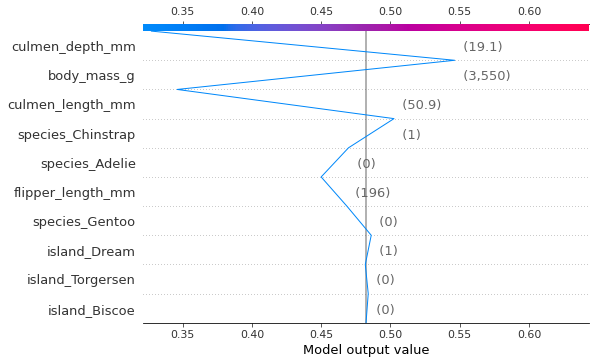

In [70]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][12], X_test.iloc[12, :])

In [71]:
shap.force_plot(explainer.expected_value[1], shap_values_test12[1], X_test.iloc[12])

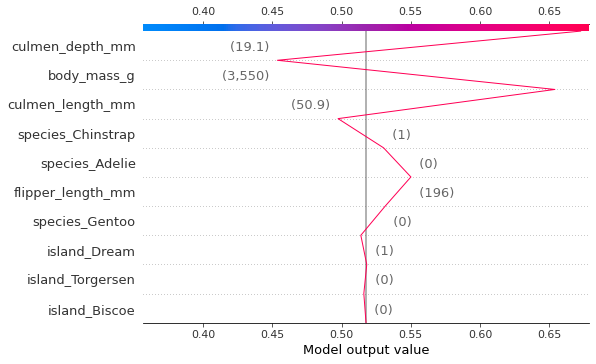

In [72]:
shap.decision_plot(explainer.expected_value[1], shap_values[1][12], X_test.iloc[12, :])